In [81]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import create_animation, imshow
from helpers.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-dt', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-layers', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-filters', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF-LPF', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/random-sampled', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/momentum-4-1', additional_subfolder='output', prefix='momentum-4-1')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF', additional_subfolder='output', prefix='HPF')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF', additional_subfolder='output', prefix='HPF-LPF')

In [3]:
ds.remesh('R64', 'R4')

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


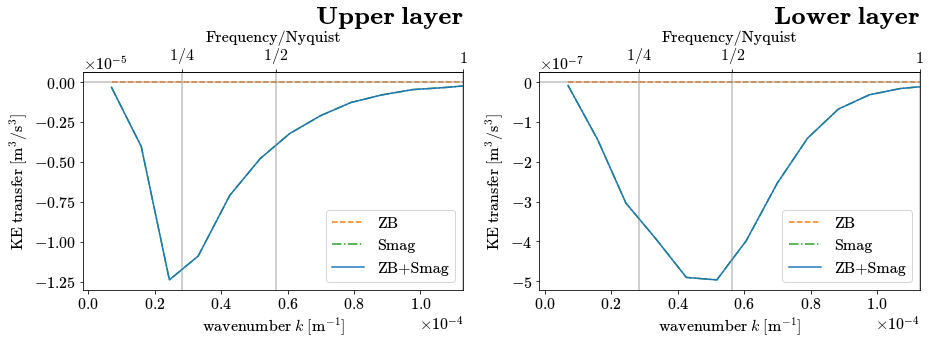

In [20]:
ds.plot_transfer('R4')

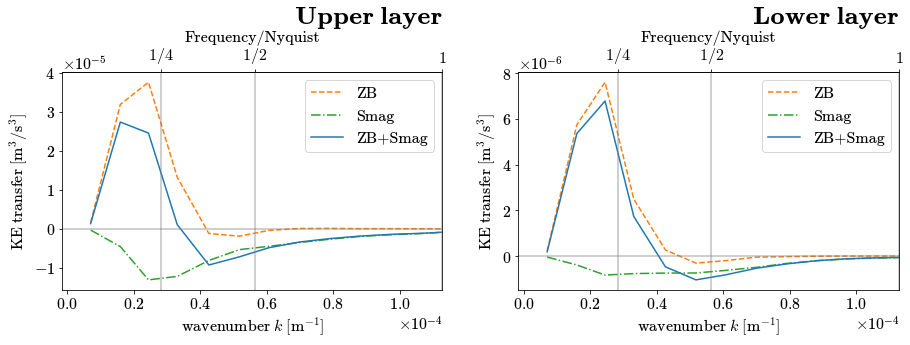

In [21]:
ds.plot_transfer('EXP205')

# Check time step

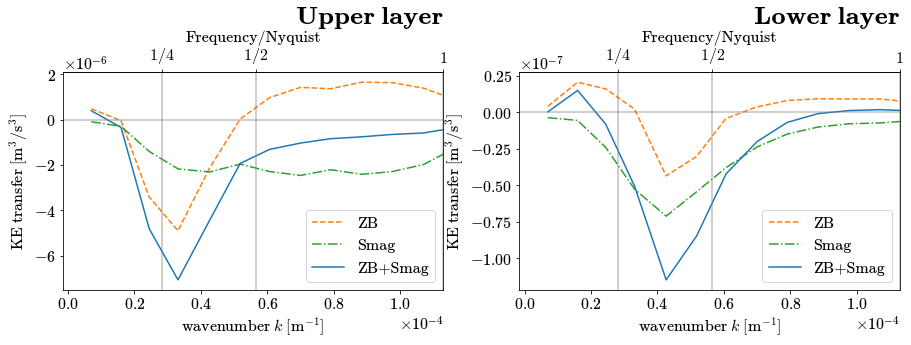

In [22]:
ds.plot_transfer('Cs-0.03-ZB-10-24-DT-270')

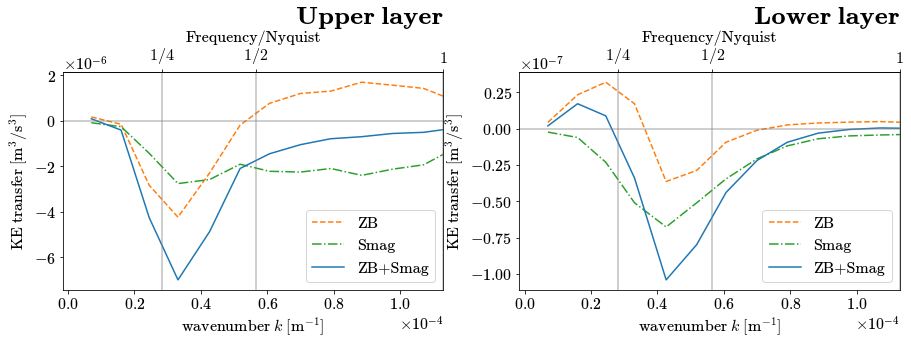

In [23]:
ds.plot_transfer('Cs-0.03-ZB-10-24-DT-4320')

# Sensitivity to amplitude in layers

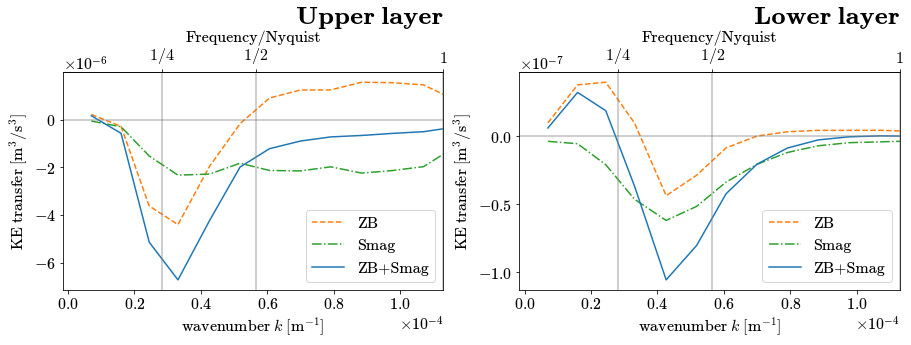

In [24]:
ds.plot_transfer('upper-10-24-lower-10-24')

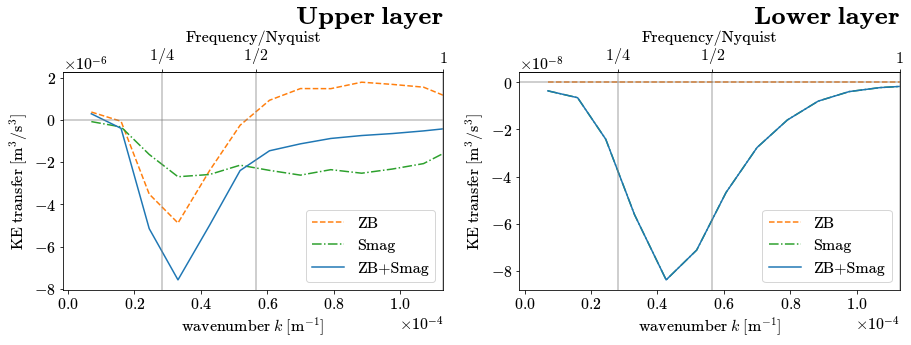

In [25]:
ds.plot_transfer('upper-10-24-lower-0-24')

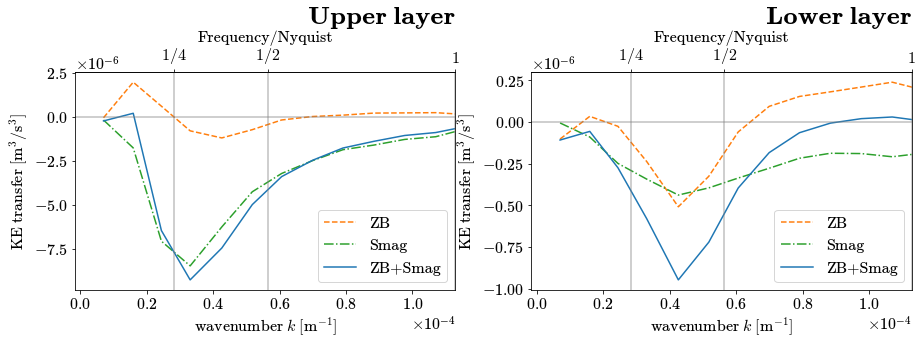

In [26]:
ds.plot_transfer('upper-2-24-lower-10-24')

# Momentum filter of lowest selectivity

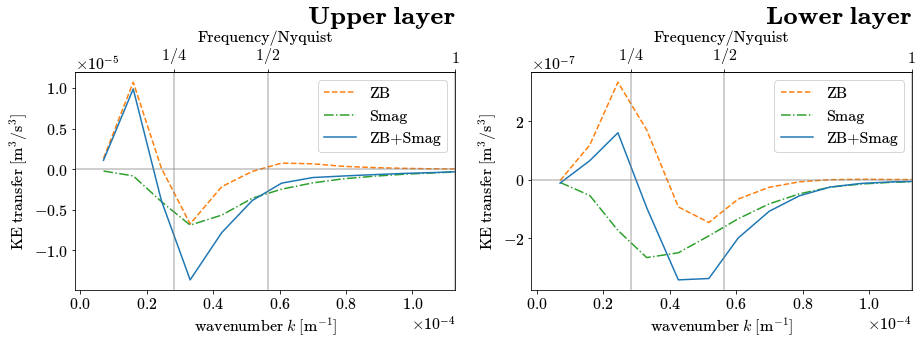

In [27]:
ds.plot_transfer('stress_iter-1-stress_order-1-upper-10-10-lower-10-10')

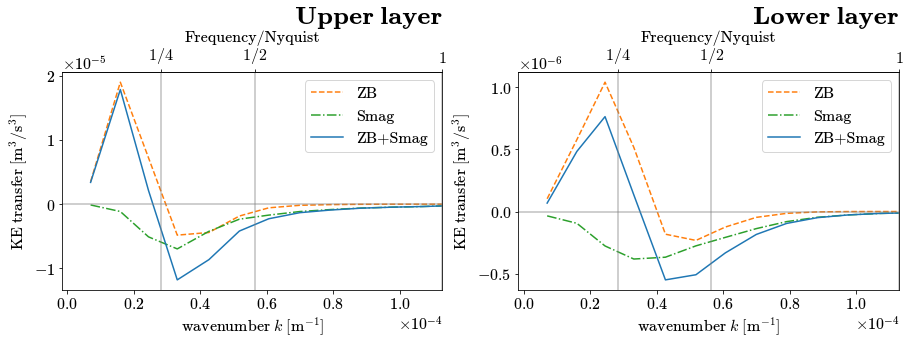

In [28]:
ds.plot_transfer('stress_iter-2-stress_order-1-upper-10-10-lower-10-10')

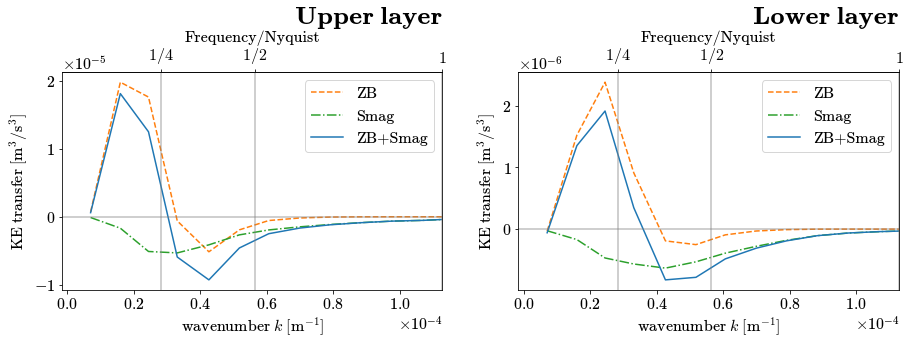

In [29]:
ds.plot_transfer('stress_iter-4-stress_order-1-upper-10-10-lower-10-10')

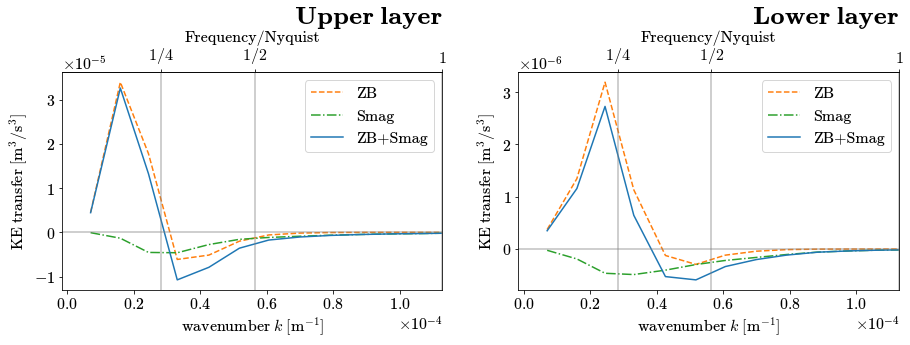

In [32]:
ds.plot_transfer('momentum-4-1-amplitude-2.0')

# Momentum filter of higher selectivity

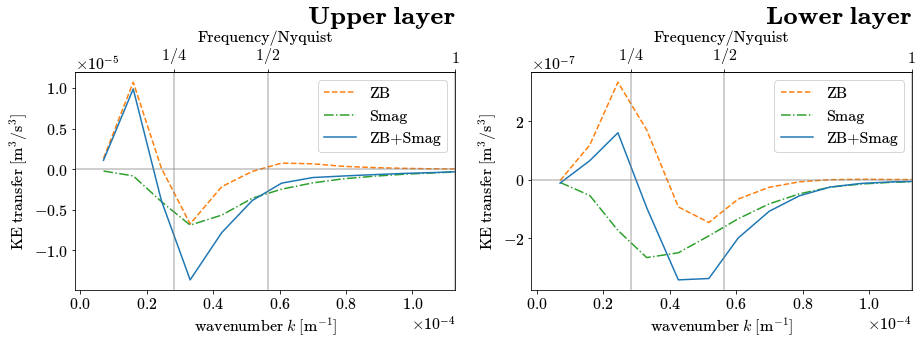

In [34]:
ds.plot_transfer('stress_iter-1-stress_order-1-upper-10-10-lower-10-10')

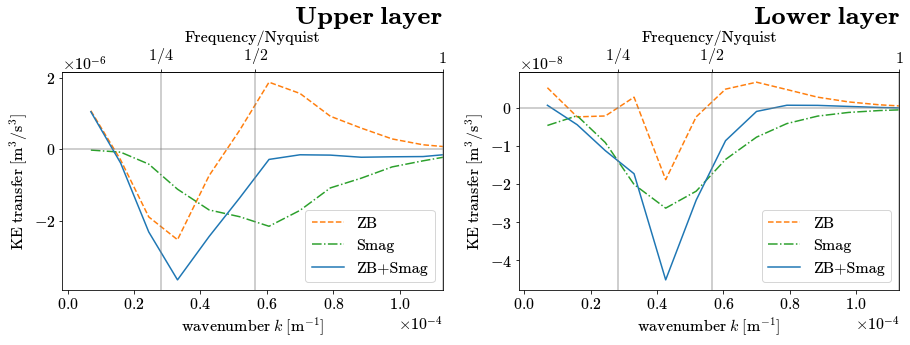

In [36]:
ds.plot_transfer('stress_iter-1-stress_order-4-upper-10-10-lower-10-10')

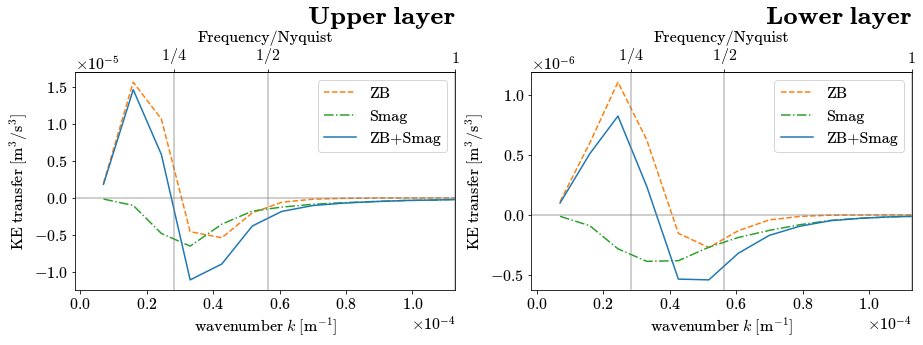

In [38]:
ds.plot_transfer('stress_iter-4-stress_order-4-upper-10-10-lower-10-10')

# High-pass-filter of velocity

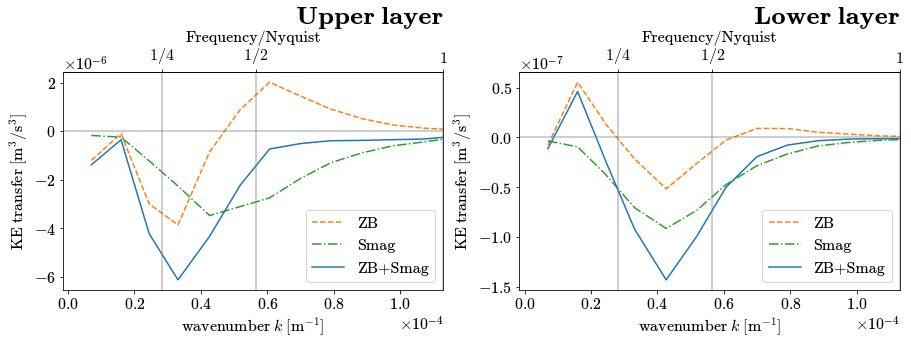

In [40]:
ds.plot_transfer('stress_iter-1-stress_order-2-upper-10-10-lower-10-10')

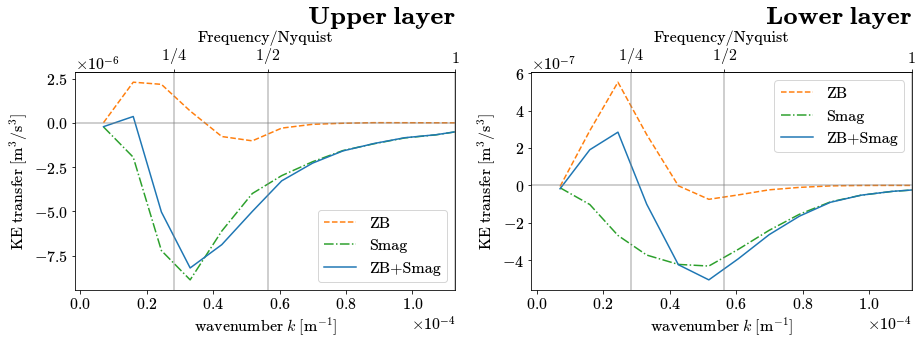

In [60]:
ds.plot_transfer('HPF-amplitude-1.0')

# Band-pass filter of velocity

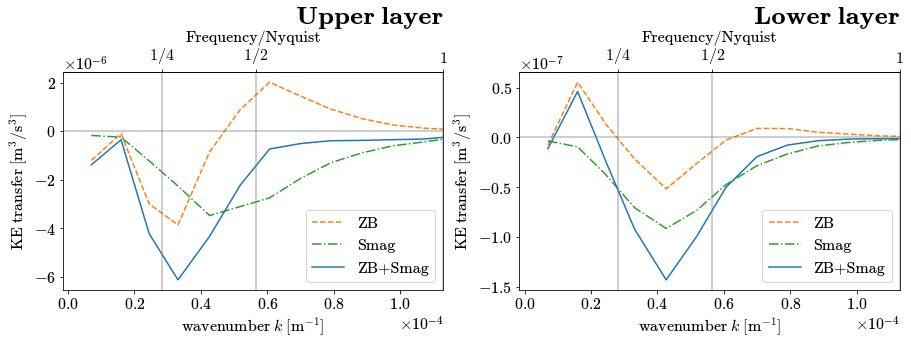

In [48]:
ds.plot_transfer('stress_iter-1-stress_order-2-upper-10-10-lower-10-10')

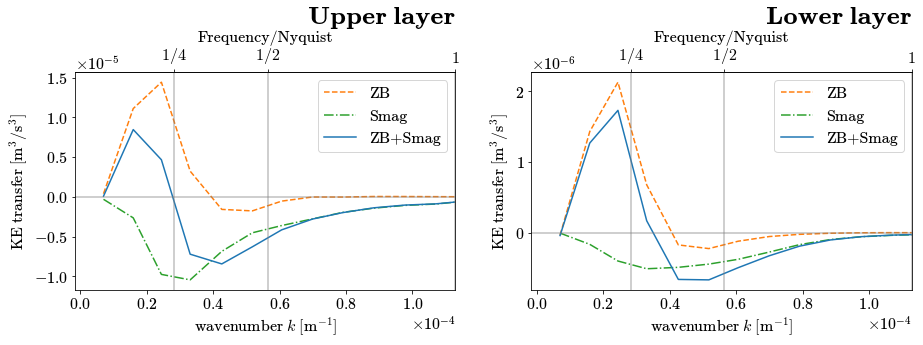

In [72]:
ds.plot_transfer('HPF-LPF-amplitude-6.25')

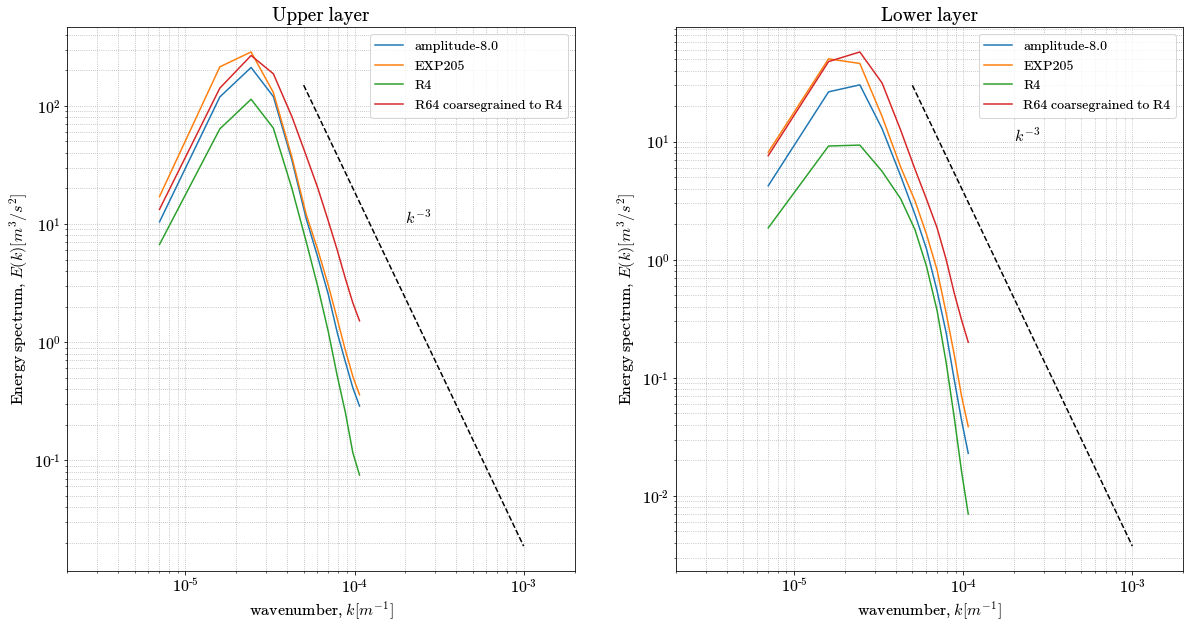

In [87]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['HPF-LPF-amplitude-8.0', 'EXP205', 'R4', 'R64_R4'],ax=ax)

In [91]:
def metric(ds,exp,target='R64_R4'):
    #return sum(ds[exp].L1_error(ds[target], features=['MKE_joul', 'EKE_joul'])[0])/4
    return ds[exp].Lk_error(ds[target], features=['ssh_mean'],k=2)[0]

In [92]:
for j in range(41):
    amp = j/4
    print('amp=',amp,', SSH_error=',metric(ds,f'HPF-LPF-amplitude-{amp}'))

amp= 0.0 , SSH_error= [0.34968376]
amp= 0.25 , SSH_error= [0.33592764]
amp= 0.5 , SSH_error= [0.3207748]
amp= 0.75 , SSH_error= [0.33023316]
amp= 1.0 , SSH_error= [0.39126092]
amp= 1.25 , SSH_error= [0.30025887]
amp= 1.5 , SSH_error= [0.3097185]
amp= 1.75 , SSH_error= [0.35637772]
amp= 2.0 , SSH_error= [0.34671614]
amp= 2.25 , SSH_error= [0.3172059]
amp= 2.5 , SSH_error= [0.3539612]
amp= 2.75 , SSH_error= [0.24543169]
amp= 3.0 , SSH_error= [0.32832465]
amp= 3.25 , SSH_error= [0.29603451]
amp= 3.5 , SSH_error= [0.2939037]
amp= 3.75 , SSH_error= [0.29482833]
amp= 4.0 , SSH_error= [0.24726516]
amp= 4.25 , SSH_error= [0.3129275]
amp= 4.5 , SSH_error= [0.25681502]
amp= 4.75 , SSH_error= [0.23905358]
amp= 5.0 , SSH_error= [0.23515327]
amp= 5.25 , SSH_error= [0.25608292]
amp= 5.5 , SSH_error= [0.2985076]
amp= 5.75 , SSH_error= [0.27228224]
amp= 6.0 , SSH_error= [0.26915276]
amp= 6.25 , SSH_error= [0.28892317]
amp= 6.5 , SSH_error= [0.22846845]
amp= 6.75 , SSH_error= [0.24817918]
amp= 7.0 , SS

In [94]:
metric(ds,'EXP205')

[0.19005771]

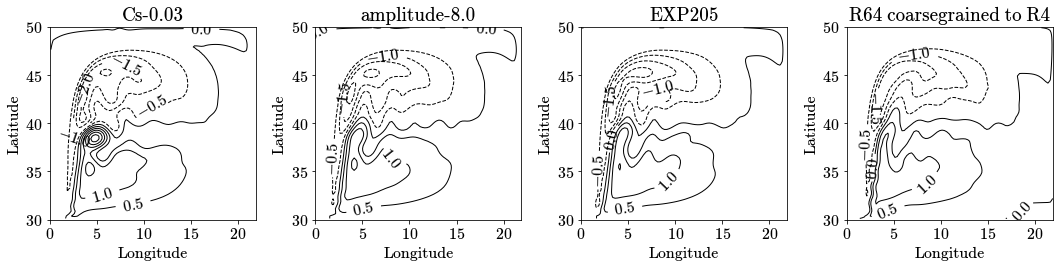

In [97]:
ds.plot_ssh(exps=['Cs-0.03', 'HPF-LPF-amplitude-8.0', 'EXP205', 'R64_R4'])

In [98]:
def plot_KE_PE(ds, exps=['R4', 'R8', 'R64_R4'], labels=['$1/4^o$', '$1/8^o$', '$1/64^o$ \n coarsegrained \n  to $1/4^o$'], color=['k', 'tab:cyan', 'tab:blue', 'tab:red']):
    plt.figure(figsize=(9,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    width = (len(exps)-1) * [0.4] + [1]
    for zl in range(2):
        plt.subplot(2,2,zl+1)
        MKE = []
        EKE = []
        for exp in exps:          
            MKE.append(1e-15*ds[exp].MKE_joul.isel(zl=zl).values)
            EKE.append(1e-15*ds[exp].EKE_joul.isel(zl=zl).values)
        x=np.arange(len(exps));
        x[-1] += 1.5
        plt.bar(x,MKE,width,label='MKE',color=color[0])
        plt.bar(x,EKE,width,bottom=MKE,label='EKE',color=color[1])
        plt.ylabel('Kinetic energy, PJ', fontsize=14);
        plt.xticks(ticks=x,labels=labels);
        if zl==0:
            plt.title('KE, Upper layer')
        else:
            plt.title('KE, Lower layer')
        plt.legend(loc='upper left', fontsize=14)
        plt.ylim([0, (EKE[-1]+MKE[-1])*(1.55-zl/2)])
        
    plt.subplot(2,2,3)
    MPE = []
    EPE = []
    for exp in exps:
        MPE.append(1e-15*ds[exp].MPE_joul.values)
        EPE.append(1e-15*ds[exp].EPE_joul.values)     
    x=np.arange(len(exps));
    x[-1] += 1.5
    plt.bar(x,MPE,width,label='MPE',color=color[2])
    plt.bar(x,EPE,width,bottom=MPE,label='EPE',color=color[3])
    plt.ylabel('Interface displacement \n potential energy, PJ', fontsize=14);
    plt.xticks(ticks=x,labels=labels);
    plt.title('Potential energy')
    plt.legend(loc='upper left', fontsize=14)
    plt.ylim([0, (EPE[-1]+MPE[-1])*1.8])
    plt.axhline(y=MPE[-1], ls=':', color=color[2])
    
    plt.subplot(2,2,4)
    EKE = []
    for exp in exps:          
        EKE.append(1e-15*ds[exp].EKE_joul.values.sum())
    x=np.arange(len(exps));
    x[-1] += 1.5
    plt.bar(x,EKE,width,label='EKE',color=color[1])
    plt.bar(x,EPE,width,bottom=EKE, label='EPE',color=color[3])
    plt.ylabel('Eddy energy, PJ', fontsize=14)
    plt.title('Energy of eddies')
    plt.xticks(ticks=x,labels=labels);
    plt.legend(loc='upper left', fontsize=14)
    plt.ylim([0, (EKE[-1]+EPE[-1])*1.4])


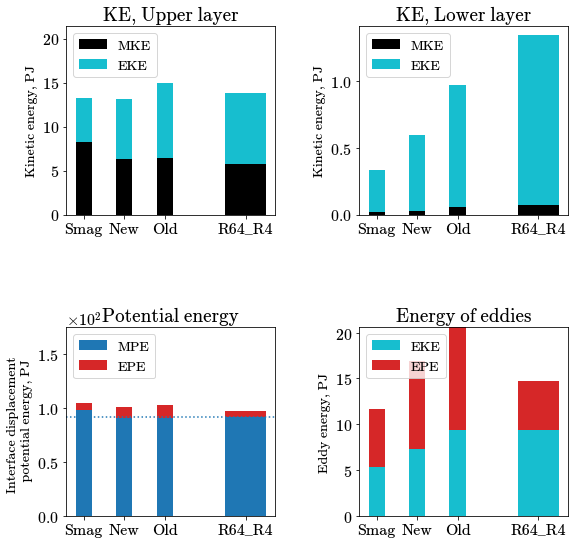

In [102]:
plot_KE_PE(ds,labels=['Smag', 'New', 'Old', 'R64_R4'],exps=['Cs-0.03', 'HPF-LPF-amplitude-8.0', 'EXP205', 'R64_R4'])